##Label


Code based on algorithm on pg 14 of "Modern hierarchical, agglomerative clustering algorithms" by Daniel Mullner

**Input:** numpy array of triples: (a, b, delta) where a and b are points (representing clusters) that were merged together at time delta. The array must already be sorted by delta.

**Output:** array of triples (ca, cb, delta) where ca, cb are cluster labels that are being merged at time delta.

**Notes:**
pg 14 error in Label(L): should call U.UNION() with find(a), find(b) rather than a, b

In [1]:
import numpy as np
import sys
import pandas as pd

In [2]:
class UnionFind:
    def __init__(self, N):
        self.parent = np.array([-1] * (2*N-1))
        self.next_label = N
        self.size = np.array([1] * N)
        self.size = np.concatenate([self.size, np.array([0] * (N-1))])
        
    def union(self, m, n):
        self.size[self.next_label] = self.size[m] + self.size[n]
        self.parent[m] = self.next_label
        self.parent[n] = self.next_label
        self.size[self.next_label] = self.size[m] + self.size[n]
        self.next_label += 1
        
    def find(self, n):
        while self.parent[n] != -1 :
            n = self.parent[n]
        return n
    
    def fast_find(self, n):
        p = n
        while self.parent[n] != -1 :
            n = self.parent[n]
        while self.parent[p] != n: # label all the way up to the root
            (p, self.parent[p]) = (self.parent[p], n)
        return n

In [3]:
def label(L, do_fast_find=True):
    LL = []
    N = len(L) + 1 # QUESTION: why isn't this len(L)??
    U = UnionFind(N)
    for idx, (a, b, delta) in enumerate(L):
        if do_fast_find:
            aa, bb = (U.fast_find(a), U.fast_find(b))
        else:
            aa, bb = (U.find(a), U.find(b))
        LL.append((aa, bb, delta, U.size[aa] + U.size[bb]))
        
        
        U.union(aa, bb)
    return LL

## Test

In [4]:
import sklearn.datasets
import scipy.cluster.hierarchy as hac
%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
data = np.load('data_for_steve.npy')

In [6]:
LL = label(data)

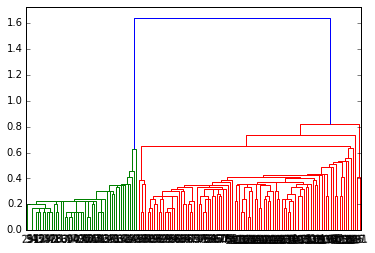

In [7]:
R = hac.dendrogram(LL)

First 50 are the easy to separate setosa, so looks like it works.

## scipy example

In [8]:
import sklearn.datasets
import scipy.cluster.hierarchy as hac
%matplotlib inline
import matplotlib.pyplot as plt

In [9]:
iris = sklearn.datasets.load_iris()

In [10]:
z = hac.linkage(iris.data)

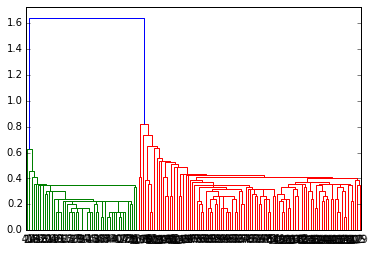

In [11]:
R = hac.dendrogram(z)